In [2]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

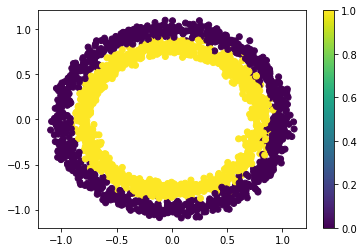

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

# Create a dataset with 2048 samples.
x, y = make_circles(n_samples=2048, factor=0.8, noise= 0.05)
plt.scatter(x[:,0], x[:,1], c=y)
plt.colorbar()

In [4]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self): 
        return len(self.x)

In [5]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=64, shuffle=True)

In [6]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.Sigmoid(),
    nn.Linear(8, 1)
).to(device)

In [7]:
!pip install torch_summary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
summary(model, torch.zeros(1,2));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─Sigmoid: 1-2                           [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


In [18]:
loss_func = nn.BCELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()

for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy.view(-1,1).float())
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

1.4504501819610596


Text(0, 0.5, 'loss')

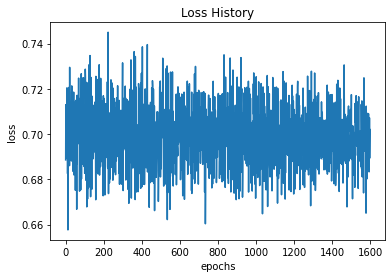

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_array = np.array(loss_history)
plt.plot(loss_array)
plt.show
plt.title('Loss History')
plt.xlabel('epochs')
plt.ylabel('loss')

In [12]:
W = model.state_dict()
W

OrderedDict([('0.weight', tensor([[ 0.6372,  0.1894],
                      [-0.5324,  0.3020],
                      [ 0.3607,  0.4348],
                      [ 0.6209, -0.2851],
                      [ 0.4616,  0.6368],
                      [-0.0509,  0.2024],
                      [-0.0427,  0.0247],
                      [ 0.1548, -0.0375]])),
             ('0.bias',
              tensor([ 0.2603,  0.0879, -0.0824,  0.4992, -0.6188, -0.2344,  0.5023, -0.6903])),
             ('2.weight',
              tensor([[ 0.2554,  0.2833,  0.1478, -0.0314,  0.2824, -0.1880,  0.0638, -0.2385]])),
             ('2.bias', tensor([0.1753]))])